In [ ]:
# Hodgkin-Huxley simulation
import matplotlib.pyplot as plt
from scipy.integrate import odeint
from numpy import linspace, array, empty

from numpy import array, empty
from math import exp

def hhRHS(Y,t):
    Yprime=array([
        rhsV(t,Y[0],Y[1],Y[2],Y[3]),
        rhsn(t,Y[0],Y[1],Y[2],Y[3]),
        rhsm(t,Y[0],Y[1],Y[2],Y[3]),
        rhsh(t,Y[0],Y[1],Y[2],Y[3])])
    return Yprime

def rhsV(t,V,n,m,h):
    Ena=55.; Ek=-82.; El=-59.; gkbar=24.34; gnabar=70.7; gl=0.3; cm=0.001
    y=-(gnabar*(m**3)*h*(V-Ena)+gkbar*(n**4)*(V-Ek)+gl*(V-El)+pulse(t))/cm
    # ^^ add in a function that will give a voltage change at a specific point in time
    # to trigger membrane potential. --> pulse(t)
    # helps us get out of the steady state
    return y

def rhsn(t,V,n,m,h):
    y=1000.*(alphan(V)*(1-n) - betan(V)*n)
    return y

def rhsm(t,V,n,m,h):
    y=1000*(alpham(V)*(1-m) - betam(V)*m)
    return y

def rhsh(t,V,n,m,h):
    y=1000*(alphah(V)*(1-h) - betah(V)*h)
    return y

def alphan(v):
    vrest=-69
    y=0.01*(10-(v-vrest))/(exp(0.1*(10-(v-vrest)))-1)
    return y

def betan(v):
    vrest=-69
    y=0.125*exp(-(v-vrest)/80)
    return y

def alpham(v):
    vrest=-69
    y=0.1*(25-(v-vrest))/(exp(0.1*(25-(v-vrest)))-1)
    return y

def betam(v):
    vrest=-69
    y=4*exp(-(v-vrest)/18)
    return y

def alphah(v):
    vrest=-69
    y=0.07*exp(-0.05*(v-vrest))
    return y

def betah(v):
    vrest=-69
    y=1/(exp(0.1*(30-(v-vrest)))+1)
    return y

def pulse(t):
    if t<0.001:
        y=0
    elif t<0.002:
        y=-20
    else:
        y=0
    return y

def rhsVcomponents(t,V,n,m,h):
    Ena=55; Ek=-82; El=-59; gkbar=24.34; gnabar=70.7; gl=0.3; cm=0.001;
    y=empty([7])
    y[0]=-gnabar*(m**3)*h*(V-Ena)/cm
    y[1]=-gkbar*(n**4)*(V-Ek)/cm
    y[2]=-gl*(V-El)/cm
    y[3]=-pulse(t)/cm
    y[4]=y[0]+y[1]+y[2]+y[3]
    y[5]=(m**3)*h
    y[6]=n**4
    return y

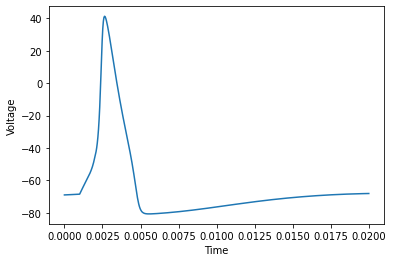

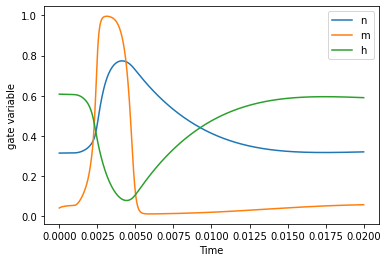

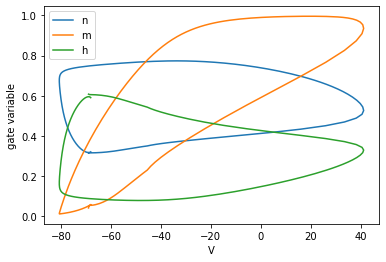

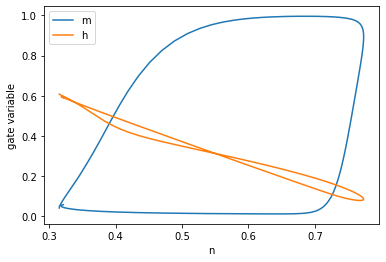

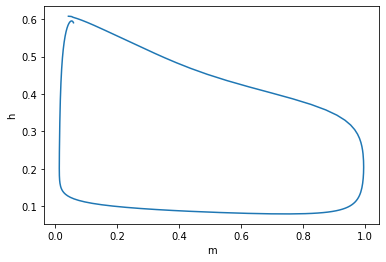

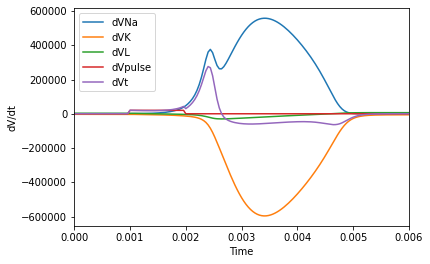

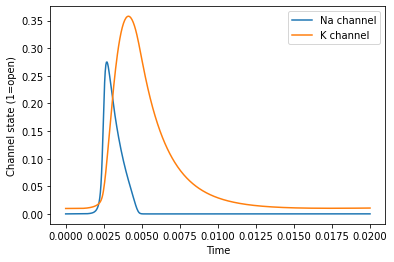

In [ ]:
times=linspace(0,0.02,501)
initvals=array([-69., 0.315, 0.042, 0.608])
sol=odeint(hhRHS,initvals,times)
plt.figure(1); plt.plot(times,sol[:,0]);
plt.xlabel('Time')
plt.ylabel('Voltage')
#plt.savefig('lec29fig1.png', bbox_inches='tight') #save the plot to a file
plt.show(block=False)

plt.figure(2)
plt.plot(times,sol[:,1],label='n')
plt.plot(times,sol[:,2],label='m')
plt.plot(times,sol[:,3],label='h')
plt.xlabel('Time')
plt.ylabel('gate variable')
plt.legend()
#plt.savefig('lec29fig2.png', bbox_inches='tight') #save the plot to a file
plt.show(block=False)

plt.figure(3)
plt.plot(sol[:,0],sol[:,1],label='n')
plt.plot(sol[:,0],sol[:,2],label='m')
plt.plot(sol[:,0],sol[:,3],label='h')
plt.xlabel('V')
plt.ylabel('gate variable')
plt.legend()
#plt.savefig('lec29fig3.png', bbox_inches='tight') #save the plot to a file
plt.show(block=False)

plt.figure(4)
plt.plot(sol[:,1],sol[:,2],label='m')
plt.plot(sol[:,1],sol[:,3],label='h')
plt.xlabel('n')
plt.ylabel('gate variable')
plt.legend()
#plt.savefig('lec29fig4.png', bbox_inches='tight') #save the plot to a file
plt.show(block=False)

plt.figure(5)
plt.plot(sol[:,2],sol[:,3])
plt.xlabel('m')
plt.ylabel('h')
#plt.savefig('lec29fig5.png', bbox_inches='tight') #save the plot to a file
plt.show(block=False)

plt.figure(6)
vcomp=empty([len(times),7])
for i in range(0,len(times)):
    vcomp[i,:]=rhsVcomponents(times[i],sol[i,0],sol[i,1],sol[i,2],sol[i,3])

plt.plot(times,vcomp[:,0],label='dVNa')
plt.plot(times,vcomp[:,1],label='dVK')
plt.plot(times,vcomp[:,2],label='dVL')
plt.plot(times,vcomp[:,3],label='dVpulse')
plt.plot(times,vcomp[:,4],label='dVt')
plt.xlim(0, 0.006)
plt.xlabel('Time')
plt.ylabel('dV/dt')
plt.legend()
#plt.savefig('lec29fig6.png', bbox_inches='tight') #save the plot to a file
plt.show(block=False)

plt.figure(7)
plt.plot(times,vcomp[:,5],label='Na channel')
plt.plot(times,vcomp[:,6],label='K channel')
plt.xlabel('Time')
plt.ylabel('Channel state (1=open)')
plt.legend()
#plt.savefig('lec29fig7.png', bbox_inches='tight') #save the plot to a file
plt.show()


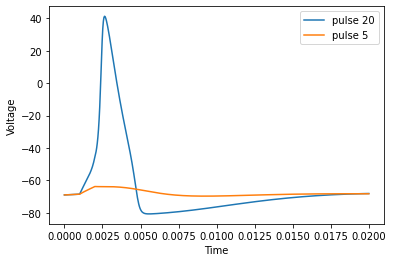

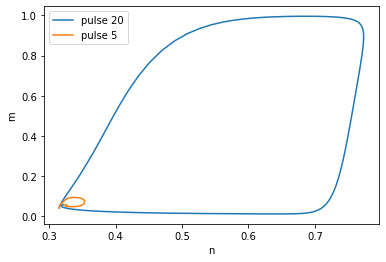

In [ ]:
plt.figure()
plt.plot(times,sol[:,0],label="pulse 20")
plt.xlabel('Time')
plt.ylabel('Voltage')

def pulse(t):
    if t<0.001:
        y=0
    elif t<0.002:
        y=-5
    else:
        y=0
    return y

sol2=odeint(hhRHS,initvals,times)
plt.plot(times,sol2[:,0],label="pulse 5")
plt.legend()
#plt.savefig('lec29fig8.png', bbox_inches='tight') #save the plot to a file
plt.show(block=False)

plt.figure()
plt.plot(sol[:,1],sol[:,2],label='pulse 20')
plt.plot(sol2[:,1],sol2[:,2],label='pulse 5')
plt.xlabel('n')
plt.ylabel('m')
plt.legend()
#plt.savefig('lec29fig9.png', bbox_inches='tight') #save the plot to a file
plt.show(block=False)

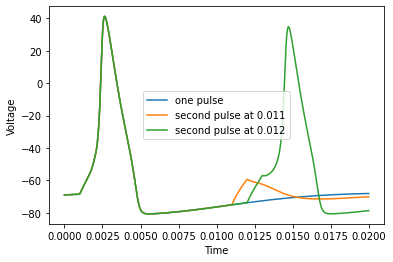

In [ ]:
plt.figure()
plt.plot(times,sol[:,0],label="one pulse")
plt.xlabel('Time')
plt.ylabel('Voltage')

def pulse(t):
    firstpulsetime = 0.001
    secondpulsetime = 0.011
    pulsewidth = 0.001
    if t<firstpulsetime:
        y=0
    elif t<firstpulsetime+pulsewidth:
        y=-20
    elif t<secondpulsetime:
        y=0
    elif t<secondpulsetime+pulsewidth:
        y=-20
    else:
        y=0
    return y

sol3=odeint(hhRHS,initvals,times)
plt.plot(times,sol3[:,0],label="second pulse at 0.011")

def pulse(t):
    firstpulsetime = 0.001
    secondpulsetime = 0.012
    pulsewidth = 0.001
    if t<firstpulsetime:
        y=0
    elif t<firstpulsetime+pulsewidth:
        y=-20
    elif t<secondpulsetime:
        y=0
    elif t<secondpulsetime+pulsewidth:
        y=-20
    else:
        y=0
    return y

sol4=odeint(hhRHS,initvals,times)
plt.plot(times,sol4[:,0],label="second pulse at 0.012")

plt.legend()
#plt.savefig('lec29fig10.png', bbox_inches='tight') #save the plot to a file
plt.show(block=False)
